In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner 
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmp4jt3zlaiGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_unn.npy')

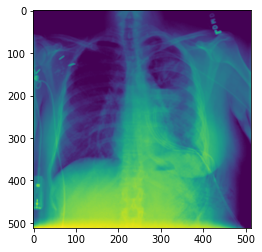

In [5]:
imshow(images[0])

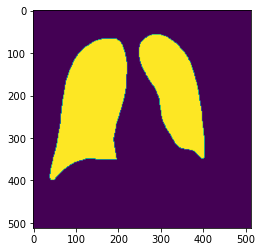

In [6]:
imshow(masks[0])

In [7]:
images = images[:6012]

In [8]:
masks = masks[:6012]

In [9]:
images.shape

(6012, 512, 512, 1)

In [10]:
masks.shape

(6012, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 24s 3s/step - loss: 0.7800 - dice_coeff: 0.3581 - val_loss: 1.9478 - val_dice_coeff: 0.0117
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.7529 - dice_coeff: 0.3650 - val_loss: 1.3744 - val_dice_coeff: 0.0328
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.7257 - dice_coeff: 0.3727 - val_loss: 1.0946 - val_dice_coeff: 0.0602
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.7154 - dice_coeff: 0.3760 - val_loss: 0.9167 - val_dice_coeff: 0.0921
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.6982 - dice_coeff: 0.3828 - val_loss: 0.7858 - val_dice_coeff: 0.1276
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6896 - dice_coeff: 0.3845 - val_loss: 0.6882 - val_dice_coeff: 0.1642
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6795 - dice_coeff: 0.3889 - val_loss: 0.6195 - va

In [16]:
R.classifier_scores

[[0.24244217574596405, 0.6915699243545532],
 [0.1933741271495819, 0.7715786695480347],
 [0.15787701308727264, 0.7889272570610046],
 [0.169411763548851, 0.7958815693855286],
 [0.1667374223470688, 0.8087507486343384],
 [0.13787339627742767, 0.8214869499206543],
 [0.12873002886772156, 0.8350143432617188]]

In [17]:
R.discriminator_scores

[[0.2971394956111908, 0.9861111044883728],
 [11.432717323303223, 0.8194444179534912],
 [20.685806274414062, 0.7472222447395325],
 [17.050092697143555, 0.7472222447395325],
 [24.24720573425293, 0.6722221970558167],
 [24.386995315551758, 0.675000011920929],
 [25.232023239135742, 0.6861110925674438]]

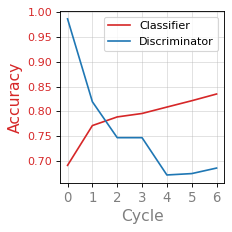

In [18]:
R.plot() 

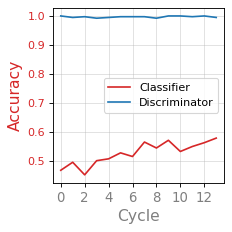

In [20]:
R.plot() //This is when I run for the first time